In [2]:
#Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper1

import matplotlib.pyplot as plt

In [3]:

### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [28]:
## Your solution here
from torch import nn
from torch import optim

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model.forward(images)
        
        # TODO: Training pass
        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.44818069833094504
Training loss: 0.18022235780001195
Training loss: 0.13209980717901862
Training loss: 0.10646844922459678
Training loss: 0.08920005090119662
Training loss: 0.07665270914299799
Training loss: 0.06714240060687296
Training loss: 0.05990612935071299
Training loss: 0.05156032452439226
Training loss: 0.046440947954709245
Training loss: 0.042001253054569115
Training loss: 0.036944631840783
Training loss: 0.03355992444676594
Training loss: 0.03002036967960649
Training loss: 0.026624367888041362
Training loss: 0.02420420408806342
Training loss: 0.02215836422026978
Training loss: 0.020520258777777228
Training loss: 0.018047830884417852
Training loss: 0.01672403783254352


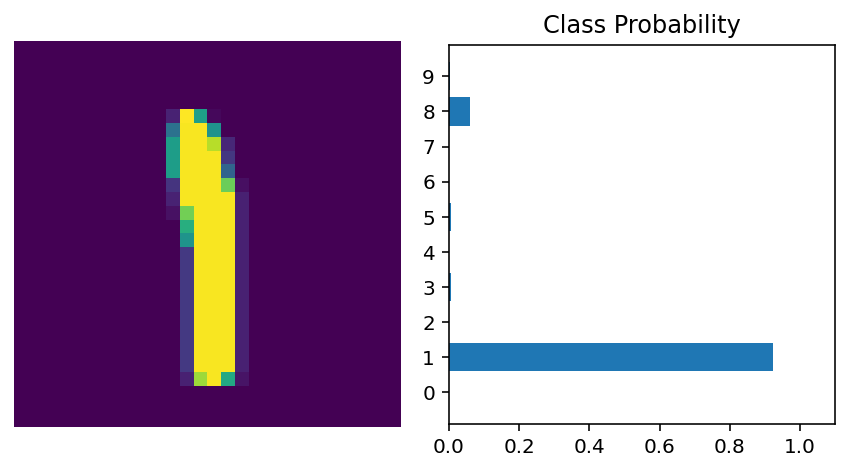

In [21]:
"""
dataiter = iter(trainloader)

images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)

img_idx = 3
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper1.view_classify(img.view(1, 28, 28), ps)
"""

##-------------------------------
%matplotlib inline
import helper1

images, labels = next(iter(trainloader))

img = images[4].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper1.view_classify(img.view(1, 28, 28), ps)